# Time Series Segmentation with aeon and ClaSP

In this notebook, we will showcase `aeon` and `ClaSP` for the task of time series segmentation. We illustrate the ease of use of ClaSP, and present the found segmentation for a show case.


# Prerequisites

In [6]:
import sys

sys.path.insert(0, "..")

import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

from aeon.annotation.plotting.utils import (
    plot_time_series_with_change_points,
    plot_time_series_with_profiles,
)
from aeon.datasets import load_electric_devices_segmentation
from aeon.segmentation import ClaSPSegmentation, find_dominant_window_sizes

The following use case shows an energy profile of electric household devices with four change points indicating different operational states or pluged household devices.

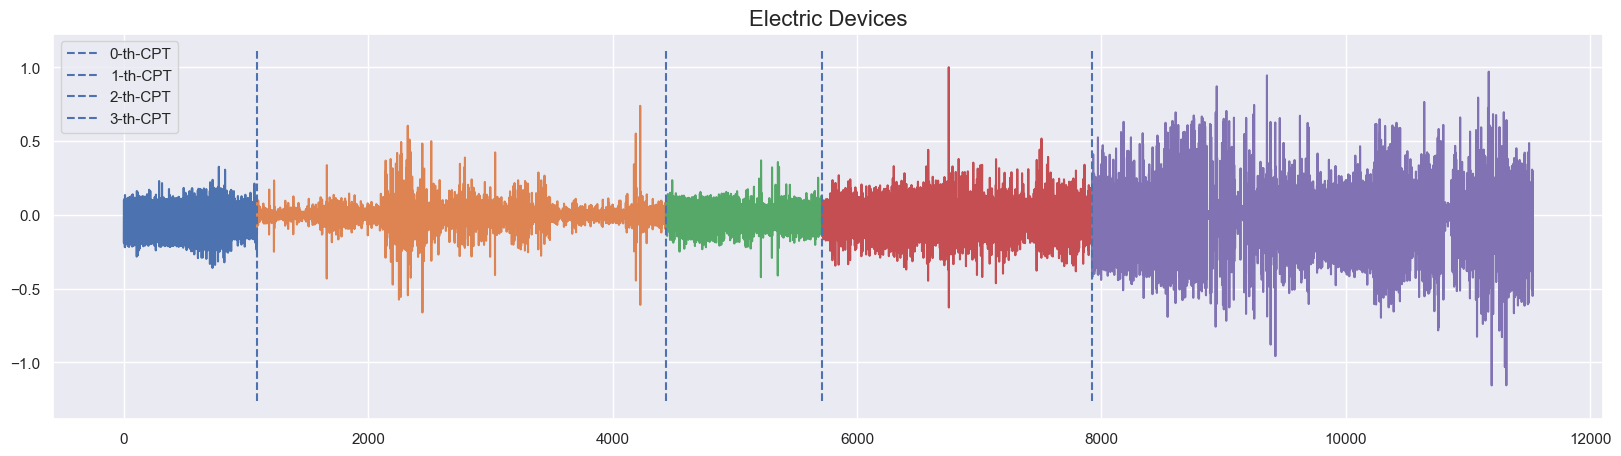

In [7]:
ts, period_size, true_cps = load_electric_devices_segmentation()
_ = plot_time_series_with_change_points("Electric Devices", ts, true_cps)

The anotated change points are around time stamps $[1090,4436,5712,7923]$, from which different electric devices are recorded.

# Time Series Segmentation through ClaSP

This Jupyter-Notebook illustrates the usage of the *Classification Score Profile (ClaSP)* for time series segmentation.

ClaSP hierarchically splits a TS into two parts, where each split point is determined by training a binary TS classifier for each possible split point and selecting the one with highest accuracy, i.e., the one that is best at identifying subsequences to be from either of the partitions.

Please refer to our paper, published at CIKM '21, for details:
*P. Schäfer, A. Ermshaus, U. Leser, ClaSP - Time Series Segmentation, CIKM 2021*

# Retrieve the data

First lets look at and plot the time series to be segmented.

In [8]:
# ts is a pd.Series
# we convert it into a DataFrame for display purposed only
pd.DataFrame(ts)

,1
1,-0.187086
2,0.098119
3,0.088967
4,0.107328
5,-0.193514
...,...
11528,0.300240
11529,0.200745
11530,-0.548908
11531,0.274886


# ClaSP - Classification Score Profile

Let's run ClaSP to find the true change point.

ClaSP has two hyper-parameters:
- The period length
- The number of change points to find

The result of ClaSP is a profile in which the maximum indicates the found change points.

In [9]:
clasp = ClaSPSegmentation(period_length=period_size, n_cps=5)
found_cps = clasp.fit_predict(ts)
profiles = clasp.profiles
scores = clasp.scores
print("The found change points are", found_cps)

KeyError: '[0] not in index'

# Visualization of segmentation
... and we visualize the results.

In [ ]:
_ = plot_time_series_with_profiles(
    "Electric Devices",
    ts,
    profiles,
    true_cps,
    found_cps,
)

The predicted change points in green closely resembles the true change points in red.

# ClaSP - Window Size Selection

ClaSP takes the window size 𝑤 as a hyper-parameter. This parameter has data-dependent effects on ClaSP’s performance. When chosen too small, all windows tend to appear similar; when chosen too large, windows have a higher chance to overlap adjacent segments, blurring their discriminative power.

A simple, yet effective method for choosing the window size is the dominant frequency of the Fourier Transform.

In [ ]:
dominant_period_size = find_dominant_window_sizes(ts)
print("Dominant Period", dominant_period_size)

Let us run ClaSP with the found dominant period length.

In [ ]:
clasp = ClaSPSegmentation(period_length=dominant_period_size, n_cps=5)
found_cps = clasp.fit_predict(ts)
profiles = clasp.profiles
scores = clasp.scores

_ = plot_time_series_with_profiles(
    "ElectricDevices",
    ts,
    profiles,
    true_cps,
    found_cps,
)